In [2]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.11.0'

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [5]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [6]:
x_train.shape

(60000, 28, 28)

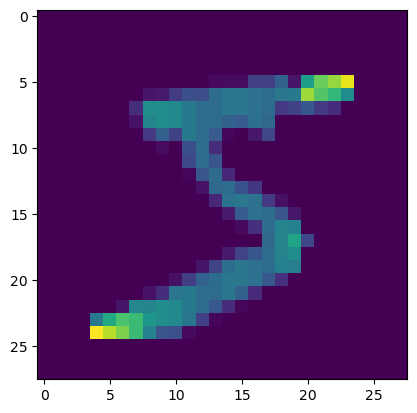

In [7]:
plt.imshow(x_train[0])

In [8]:
model = tf.keras.models.Sequential()

2022-12-03 05:10:27.009519: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2022-12-03 05:10:27.009603: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-03 05:10:27.009664: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dell): /proc/driver/nvidia/version does not exist
2022-12-03 05:10:27.010417: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# model arch
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [10]:
  model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3


2022-12-03 05:10:28.524373: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2668 - accuracy: 0.9223
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1094 - accuracy: 0.9655
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0735 - accuracy: 0.9769


In [12]:
loss_val, acc_val = model.evaluate(x_test, y_test)
loss_val, acc_val

313/313 [==============================] - 0s 1ms/step - loss: 0.0943 - accuracy: 0.9708


(0.09434840083122253, 0.97079998254776)

In [13]:
model.save('mnist_trained.model')

INFO:tensorflow:Assets written to: mnist_trained.model/assets


INFO:tensorflow:Assets written to: mnist_trained.model/assets


In [14]:
new_model = tf.keras.models.load_model('mnist_trained.model')

In [15]:
predictions = new_model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [16]:
predictions.shape

(10000, 10)

In [17]:
predictions[0]

array([7.5563944e-10, 8.6912921e-09, 1.2297596e-06, 1.3380409e-06,
       1.8938988e-10, 5.5521315e-10, 2.1002004e-14, 9.9999744e-01,
       3.9426190e-10, 3.2331943e-08], dtype=float32)

In [18]:
print(np.argmax(predictions[0]))

7


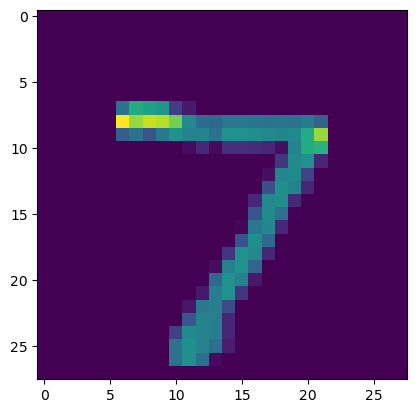

In [19]:
plt.imshow(x_test[0])

In [20]:
#convlution

In [21]:
# model arch
model = tf.keras.models.Sequential()



# Add convolutions and max pooling
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,1)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [22]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [23]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3


2022-12-03 05:12:02.792850: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 19s 10ms/step - loss: 0.1747 - accuracy: 0.9469
Epoch 2/3
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0581 - accuracy: 0.9823
Epoch 3/3
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0396 - accuracy: 0.9874


In [26]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0414 - accuracy: 0.9872


[0.04144938662648201, 0.9872000217437744]

In [28]:
print(y_test[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


1/1 [==============================] - 0s 17ms/step


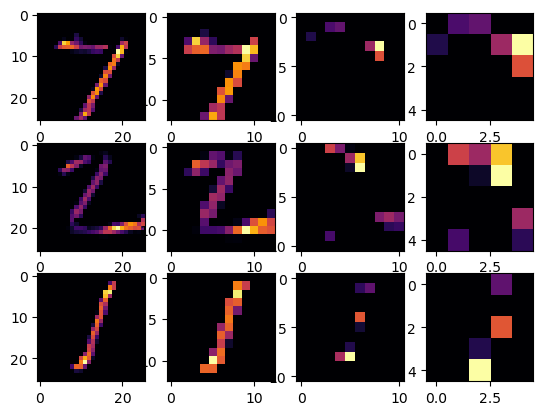

In [30]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=1
THIRD_IMAGE=2
CONVOLUTION_NUMBER = 31

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)